# Visualize a Decision Tree
*Paulo G. Martinez* Wed. Jun. 3rd - 4th, 2020

In this notebook I'll be doing three things:

## 1. Explaining the problem we are trying to solve and the data we'll be working with
## 2. Brief introduction into what a decision tree is and how it can be used to predict the classification of a record
## 3. Brief explanation of why you should almost never rely on a single decision tree
---

**Let's start by importing the software packages I'll be using in the rest of the notebook**

In [1]:
# for plotting
import matplotlib.pyplot as plt
# for os agnostic path handling (handle backslashes vs frontslashes)
from pathlib import Path
# for dataframe manimupation
import pandas as pd
# import tree models
from sklearn import tree
# import the Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
# import a function to split our data into training and test sets
from sklearn.model_selection import train_test_split
# import a function to visualize how well the model did
from sklearn.metrics import plot_confusion_matrix

## Explaining the problem we are trying to solve and the data we'll be working with
---
### Business Requirement: Improve Usability
- Let's suppose we manage a website for an organization which stores and publishes a large quantity of important content. 
- The organization would like to improve the usability of its site to "just work *you know,* the way Amazon or Google does." 
- However, unlike Amazon or Google which can prioritize paid or trending content and allow the rest to be buried at the end of a search result, our organization is committed to improving usability across all of its content even the content that is rarely relevant, because when it is relevant, its crucial. 
- They want a "quick win" an innovation that radically transforms the usability across all the site and attracts new users.
- But it would also be great if you didn't move things around *too* much because their most loyal users already know their way around and get frustrated if they need to learn a whole new layout.

### Proposed Solution: A Content Recomender. 
- A small unobtrusive panel with a short list of "quick links" that takes each user directly to the content they want without having to slog through a long path of clicks, scrolls, and dropdowns and without altering the current structure of the site.
- **We actually are not going to analyze their content and try to correlate it to their search queries**
    - their content is "messy" and hard to access, analyze, or understand
    - their queries are inconsistent
        - they are either "naive" inputs by newcomers accustomed to "google like power"
        - or highly specialize inputs from expert powerusers
- **Instead, we are going to analyze the usage patterns in the the web-session data**
    - and label it according to what content they interacted with
    - The advantages of this data set are 
        - that it is much less likely to have been made "messy" in the past
        - and it is constantly refreshing and updating itself (every time a user uses the sight they add a relevant data record to our set)

**read in the data**

In [2]:
# declare the path to the data
file_path = 'data/example-web-session-data.csv'
# handle os differences in slashes
file_path = Path(file_path)
# read the data into a dataframe
web_sesh_df = pd.read_csv(file_path)
# display the head of the data frame
web_sesh_df.head(10)

,start_hour,weekday,chrome_browser,firefox_browser,1st_page_search,1st_page_faq,2nd_page_search,2nd_page_faq,TARGET_DOWNLOAD
0,7.9,3,False,False,False,True,True,False,0
1,6.9,4,False,False,True,False,True,False,0
2,6.7,5,True,True,True,False,False,False,2
3,9.4,4,False,False,False,True,True,False,0
4,9.2,5,True,False,False,False,False,False,2
5,8.2,4,False,False,False,True,True,False,0
6,14.9,2,True,True,True,True,False,True,1
7,14.8,2,True,True,True,True,False,True,1
8,6.9,4,False,True,False,True,False,True,2
9,7.0,3,True,True,True,False,False,True,1


### About the data
#### This data was "synthesized"
- The data was synthesized to be classifiable (i.e. to have a signal a machine learning classifier can "tune in to.")
- The feature/columns were selected (and values were "massaged") to represent some intuitive features about a user's session on a website.

#### Suppose we have data on a website's user-sessions
Including things like the time they accessed the site, the browser they are using, and which pages they visited and in which order. We also know what file they ultimately downloaded.

**In the real world you'll likely have many more features** for a session's record and they might require some cleaning and restructuring. But even if there are some noisy or redundant features a machine learning model can usually "tune in" to the ones that are "predictive" of the target you are trying to predict.
- **what the algorithm can do** much more efficiently for us is to measure and sort the features by their "correlation" to the target
- **what the algorithm can't do** is make judgement calls about which features are acceptably messy or redundant and which need to be refinend or cleaned.
    - For example, note that the boolean columns in our synthetic data set are not mutually exclusive, contrary to what you might expect (ex: the data may indicate the user used both firefox and chrome for the same session). This is merely an artifact of generating synthetic data, but for our "in fiction" purposes we can pretend they are the result of sloppy setup for the session tracking.

### data dictionary
- **start_hour** - a float between 0 and 24 representing the hours in a day
- **weekday** - an integer between 1 and 7 representing the days in a week
- **chrome_browser, firefox_browswer** - a boolean indicating whether the user accessed the site with a given browser
- **1st_page_search, 1st_page_faq** - a boolean indicating which page the user visited first during this session
- **2nd_page_search, 2nd_page_faq** - a boolean indicating which page the user visited second during this session
- **TARGET_DOWNLOAD** - an integer 0, 1, 2, indicating which of three available files a user downloaded at the end of their session

Next up, we'll use a decision tree to predict what file a user will download based on their session data. So let's split the, we'll 'train' the model on 75% of the data, and 'test' it on the rest.

In [3]:
# randomly split the data into test and training
X_train, X_test, y_train, y_test = train_test_split(
    # split the data, and the target we're trying to predict
    web_sesh_df.drop(columns = ['TARGET_DOWNLOAD']), web_sesh_df['TARGET_DOWNLOAD'],
    # keep 75% of the data for training
    train_size = .75,
    # use an integer random state to ensure reproducibility
    random_state = 1,
)

## Brief introduction into what a decision tree is and how it can be used to predict the classification of a record
---

**A decision tree is much easier to understand when you can see it. So let's instantiate and plot one with our data.**

In [4]:
# instantiate a decision tree classifier
classifier = DecisionTreeClassifier(
    # use an integer to ensure reproducible results
    random_state = 1,
    # declare how manny levels we want the tree to have (we'll start with 3 for simplicity)
    max_depth = 3
)
# fit the model to the training data
classifier.fit(
    # data without the target
    X_train,
    # target labels/classes
    y_train
)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

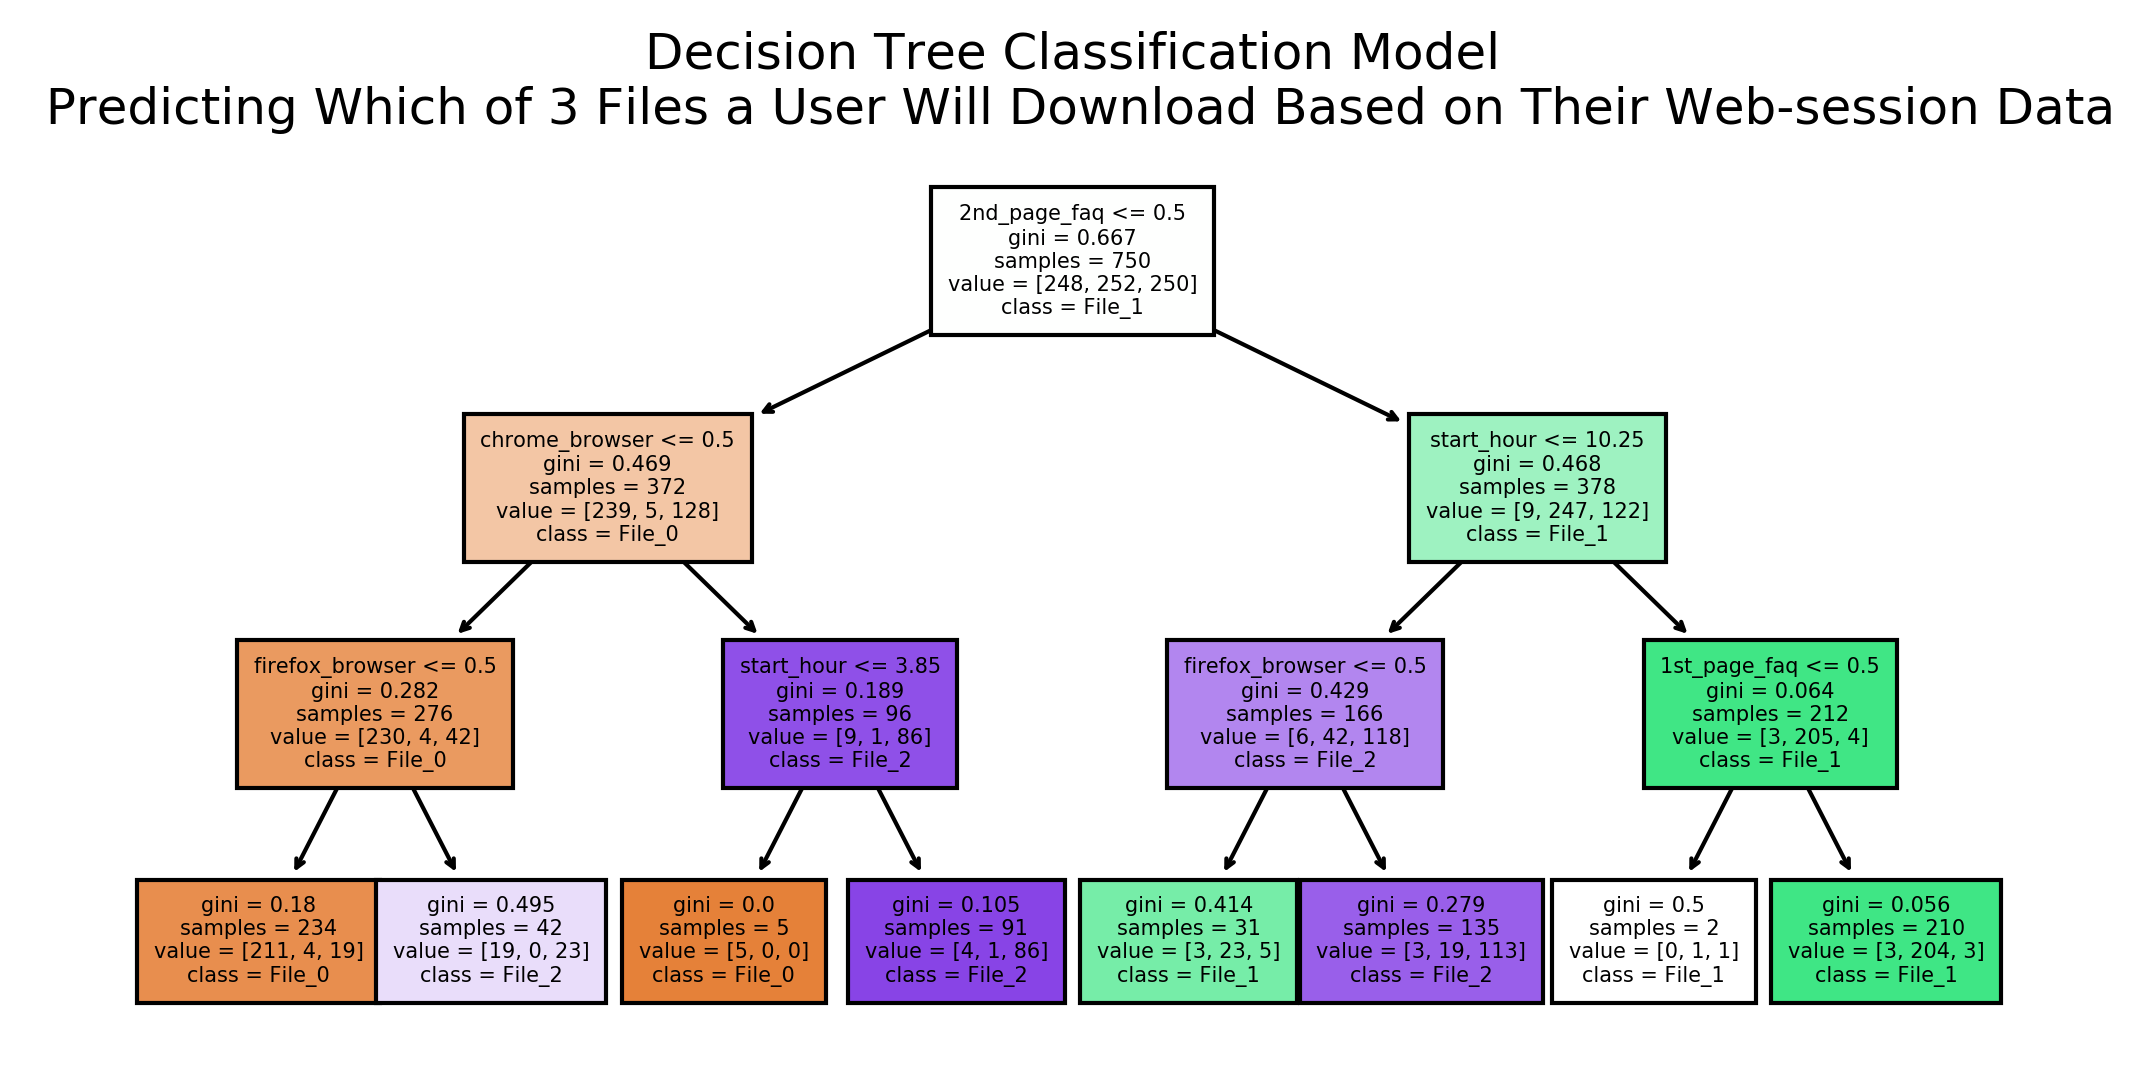

In [5]:
# define a figure and axes in which to plot
fig, axes = plt.subplots(
    # one by one grid of subplots (aka one plot)
    1,1,
    # size of the figure
    figsize = (8,4),
    # dots per inch (resolution of the image)
    dpi = 300
)
# plot the tree
tree.plot_tree(
    # declare the tree to plot
    classifier,
    # feature names, are the column headers (except for the target column)
    feature_names = X_train.columns,
    # the labels of the predicted classes
    class_names = ['File_0', 'File_1', 'File_2'],
    # fill in the nodes according to how "pure" the predicted set is at each node
    filled = True,
    fontsize=5,
)
plt.title('Decision Tree Classification Model\n Predicting Which of 3 Files a User Will Download Based on Their Web-session Data')
plt.show()

### What the algorithm is doing
*At a very abstract level we can say that the algorithm begins by doing a "brute force scan" where it splits the sampled records on the values in every feature and calculates which results in the "purest" subsamples. Once it has found the best feature to split on, it executes the split and repeats the process at each "child node." The task gets easier and shorter at every level because there are fewer features remaining to test and fewer samples in each node when measuring the "purity"*

#### How to read this plot: 
Each node shows 5 pieces of information
- the feature and the specific threshold value in that feature which was used to split the samples
    - ex: the "root node" is splitting data on the `2nd_page_faq` feature and used `.5` as the threshold between the numerical expressions of `True` and `False`
- the "gini impurity" score of the resulting subsamples 
- the number of samples in each node
- the value counts of each class
    - ex: [248, 252, 250] indicates 248 of the sessions downloaded `File_0`, 252 sessions downloaded `File_1` and so on.
- the class label that is most represented in that node (i.e. the predicted label)


#### for an in depth and very gentle explanation of the specific operations in the algorithm
- check out this 17-minute [StatQuest video](https://www.youtube.com/watch?v=7VeUPuFGJHk&vl=en)
    - I found it helpful for the step by step details in the algorithm which are too long to try and summarize here but are actually very straightforward and easy to understand when you go through them.
- Or you can google around there are tons of resources

### So, how well does the decision tree do at predicting which file each user will download?

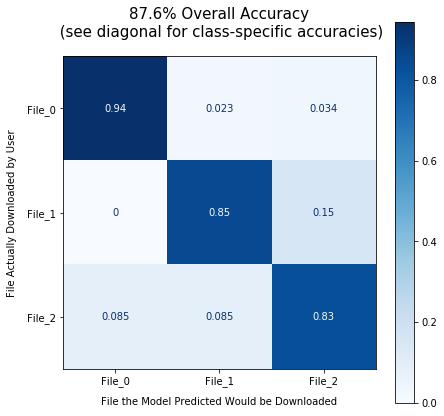

In [6]:
# define a figure and axes in which to plot
fig, axes = plt.subplots(
    # one by one grid of subplots (aka one plot)
    1,1,
    # size of the figure
    figsize = (7,7),
)
# plot the model's "accuracy" for each class
plot_confusion_matrix(
    classifier,
    X_test, y_test,
    display_labels = ['File_0', 'File_1', 'File_2'],
    cmap = plt.cm.Blues,
    normalize = 'true',
    ax = axes,
)
# score the classifier's accuracy over all
score = classifier.score(X_test, y_test)
feedback = f"{100*score:,}% Overall Accuracy\n (see diagonal for class-specific accuracies)"
# Clarify the plot with some comments
plt.title(feedback, fontdict={'size':15},pad = 20)
plt.ylabel('File Actually Downloaded by User', labelpad = 10)
plt.xlabel('File the Model Predicted Would be Downloaded', labelpad=10)
plt.show()

## 3. Brief explanation of why you should almost never rely on a single decision tree
### Advantages of decision trees
- **they are easy to interpret compared to other models.**
    - You can tell which features (and which specific values) are most important to the model's ability to classify records into "this or that cluster" because they are the features appearing at the highest nodes.
- **they can handle both numeric and categorical data**
    - All you have to do is encode the categorical features (see appendix below)

### Disadvantages of decision trees
- **They are highly succeptible to "overfitting."** In other words they can get highly accurate because each leaf in the tree is describing a very detailed set of conditions which the model has no way of knowing will apply to data it hasn't yet trained on.
- the "deeper" the tree gets, the longer the set of conditions required to apply to the prediction
    - ex: if the second page visited was the faq page, and if they visited before 10:30, and if they were using a firefox browser, etc.

### The solution to a single decision tree 🌳 is more decision trees 🌳🌳🌳🌳🌳🌳🌳🌳🌳🌳🌳🌳🌳🌳🌳🌳🌳🌳🌳🌳🌳🌳🌳🌳🌳🌳🌳🌳🌳🌳🌳🌳🌳🌳🌳🌳🌳🌳🌳🌳🌳🌳🌳🌳🌳🌳🌳🌳🌳🌳🌳🌳🌳🌳🌳🌳🌳🌳🌳🌳🌳🌳🌳🌳🌳🌳🌳🌳🌳🌳🌳🌳
- A "random forest" model is basically just a collection of decision trees. 
- they all get randomly selected subsets of data and features to analyze and "fit" to
- then each tree "votes" on what its prediction is
- the prediction with the majority vote is what the "forest" is predicting
- conceptually, we are applying the statistical concepts of random shuffling and prioritizing patterns that are true in general as opposed to the patterns that were true as a "fluke."
- there is A LOT more to be said about random forests but we won't be covering that here. 
    - here's another good [stats quest video](https://www.youtube.com/watch?v=J4Wdy0Wc_xQ) 

 ## Appendix

**how to "encode" a categorical feature so a decision tree can ingest it**

In [7]:
# suppose you had the following column in a table
toy_df = pd.DataFrame({'categorical_feature': ['a', 'b', 'c', 'a']})
toy_df

,categorical_feature
0,a
1,b
2,c
3,a


In [8]:
# this is a simple way to "dummy encode it" into numerical features
pd.get_dummies(toy_df)

,categorical_feature_a,categorical_feature_b,categorical_feature_c
0,1,0,0
1,0,1,0
2,0,0,1
3,1,0,0
